#Getting input 

In [2]:
def inp(a):
    if a: return Requests
    s = list(map(int, input().split(',')))
    return s
    
Stock_Length = 100
Requests = inp(0)
print(Requests)

106, 187, 914, 106, 33, 18, 402, 230, 507, 495, 609, 627, 346, 295, 312, 107, 716, 88, 106, 248, 689, 115, 106, 218, 672, 618, 117, 805, 306, 753, 414, 84, 557, 266, 409, 144, 69, 116, 333, 88, 264, 967, 180, 251, 71, 788, 581, 555, 988, 292, 60, 125, 532, 405, 170, 249, 181, 686, 283, 424, 933, 23, 99, 135, 246, 337, 648, 753, 354, 518, 45, 286, 315, 370, 557, 463, 312, 284, 61, 412, 457, 118, 268, 123, 232, 788, 678, 371, 171, 557, 549, 286, 356, 92, 148, 515, 301, 632, 987, 660, 868, 92, 544, 211, 70, 75, 145, 125, 278, 441, 368, 351, 119, 662, 653, 186, 517, 43, 224, 506, 592, 501, 149, 79, 241, 53, 80, 437, 46, 78, 149, 525, 149, 126, 365, 460, 280, 266, 109, 86
[106, 187, 914, 106, 33, 18, 402, 230, 507, 495, 609, 627, 346, 295, 312, 107, 716, 88, 106, 248, 689, 115, 106, 218, 672, 618, 117, 805, 306, 753, 414, 84, 557, 266, 409, 144, 69, 116, 333, 88, 264, 967, 180, 251, 71, 788, 581, 555, 988, 292, 60, 125, 532, 405, 170, 249, 181, 686, 283, 424, 933, 23, 99, 135, 246, 337, 648

#Cost function

In [37]:
def cost(arr, length):
    cur = 0
    cnt = 1
    for i in arr:
        if cur + i > length:
            cur = i
            cnt += 1
        else:
            cur += i
    return cnt
print(cost([1,2,3,4,2,5,2,6], 6))
    

5


#Neighbor 

In [83]:
import math, random
def neighbor(arr):
    a = random.randint(0, len(arr)-1)
    b = (a + random.randint(1, len(arr)-1)) % len(arr)
    idx[a], idx[b] = idx[b], idx[a]
    arr[a] ,arr[b] = arr[b], arr[a]
    return arr
print(neighbor([1,2,3,4,5]))

[1, 4, 3, 2, 5]


#drawing the progress and printing res

In [90]:
def draw(progress):
    import matplotlib.pyplot as plt
    plt.plot(progress)
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    plt.show()
    
def Print(arr, idx, length):
    print(best_cost)
    cur = 0
    cnt = 1
    j = 0
    print("stock 1: ", end = '')
    for i in arr:
        if cur + i > length:
            print()
            print("stock " + str(cnt + 1) + ": ", end = '')
            cur = i
            cnt += 1
        else:
            cur += i
            
        print(idx[j], end = ', ')
        j += 1

#Main function

In [88]:
import time
def simulated_anealing(Requests, Stock_Length, T, a, End):
    best = Requests
    global best_cost
    best_cost = cost(Requests, Stock_Length)
    
    cur = Requests
    cost_cur = cost(cur, Stock_Length)
    progress = [cost_cur]
    itr = 1
    
    while best_cost > End: #itr < 5000:
        
        new = neighbor(cur)
        cost_new = cost(new, Stock_Length)
        if cost_new < best_cost:
            best_cost = cost_new
            best = cur
        #time.sleep(0.01)
        d_cost = cost_new - cost_cur
        #print(itr,' ',math.exp(-d_cost / T), cost_cur, end = '\r', flush=True); itr+=1;
        print(itr,' ', best_cost, end = '\r', flush=True); itr+=1;
        if d_cost <= 0:
            cur = new
            cost_cur = cost_new
        else:
            q = random.random()
            if q < math.exp(-d_cost / T):
                #print(":D")
                cur = new
                cost_cur = cost_new
        T *= a
        progress.append(cost_cur)
    draw(progress)
    

At first it seems it can't even get to the right answer for the sample 1 (it stucks in 59) 

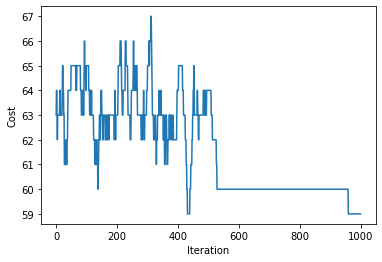

In [66]:
Stock_Length = 1000
Requests = inp(1)
simulated_anealing(Requests,Stock_Length, 100, 0.99, 51)

In [ ]:
def neighbor2(arr):
    random.shuffle(arr)
    return arr

def simulated_anealing(Requests, Stock_Length, T, a, End):
    best = Requests
    global best_cost
    best_cost = cost(Requests, Stock_Length)
    cur = Requests
    cost_cur = cost(cur, Stock_Length)
    progress = [cost_cur]
    itr = 1
    
    while best_cost > End: #itr < 5000:
        
        new = neighbor2(cur)
        cost_new = cost(new, Stock_Length)
        if cost_new < best_cost:
            best_cost = cost_new
            best = cur
        #time.sleep(0.01)
        d_cost = cost_new - cost_cur
        #print(itr,' ',math.exp(-d_cost / T), cost_cur, end = '\r', flush=True); itr+=1;
        print(best_cost, end = '\r', flush=True); itr+=1;
        if d_cost <= 0:
            cur = new
            cost_cur = cost_new
        else:
            q = random.random()
            if q < math.exp(-d_cost / T):
                #print(":D")
                cur = new
                cost_cur = cost_new
        T *= a
        progress.append(cost_cur)
    draw(progress)
    Print(best, idx, Stock_Length)
Stock_Length = 1000
Requests = inp(0)
idx = [i for i in range(len(Requests))]
simulated_anealing(Requests,Stock_Length, 1000, 0.999, 56)